G2M insight for Cab Investment firm

In [174]:
import pandas as pd
import numpy as np
import sweetviz as sw
import matplotlib.pyplot as plt
import missingno as msno


In [175]:
cab_data = pd.read_csv("Cab_Data.csv")
customer_id = pd.read_csv("Customer_ID.csv")
transaction_id = pd.read_csv("Transaction_ID.csv")
city = pd.read_csv("City.csv")

merged_data = pd.merge(cab_data, transaction_id, on='Transaction ID')
final_data = pd.merge(merged_data, customer_id, on='Customer ID')
df= pd.merge(final_data, city, on='City')



In [176]:
data_list = ["cab_data.csv", "customer_id.csv", "transaction_id.csv", "city.csv"]

def show_head(data_list):
    for data in data_list:
        df = pd.read_csv(data)
        print(f"Data: {data}")
        print(df.head())
        print("Describe" + "\n")
        print(df.describe())
        print("Null Values", df.isnull().sum().values ) 
        print("-" * 100 + "\n")
        
show_head(data_list)

Data: cab_data.csv
   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     08/01/2016  Pink Cab  ATLANTA GA         30.45   
1        10000012     06/01/2016  Pink Cab  ATLANTA GA         28.62   
2        10000013     02/01/2016  Pink Cab  ATLANTA GA          9.04   
3        10000014     07/01/2016  Pink Cab  ATLANTA GA         33.17   
4        10000015     03/01/2016  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
Describe

       Transaction ID   KM Travelled  Price Charged   Cost of Trip
count    3.593920e+05  359392.000000  359392.000000  359392.000000
mean     1.022076e+07      22.567254     423.443311     286.190113
std      1.268058e+05      12.233526     274.378911     157.993661
min      1.000001e+07       1.900000      15.600000      19.000000
25%  

In [177]:
#sweet_report = sw.analyze(df,target_feat="Cost of Trip")
#sweet_report.show_html('sweetviz_report.html')

c:\Users\w10\anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\w10\anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\w10\anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\w10\anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, s

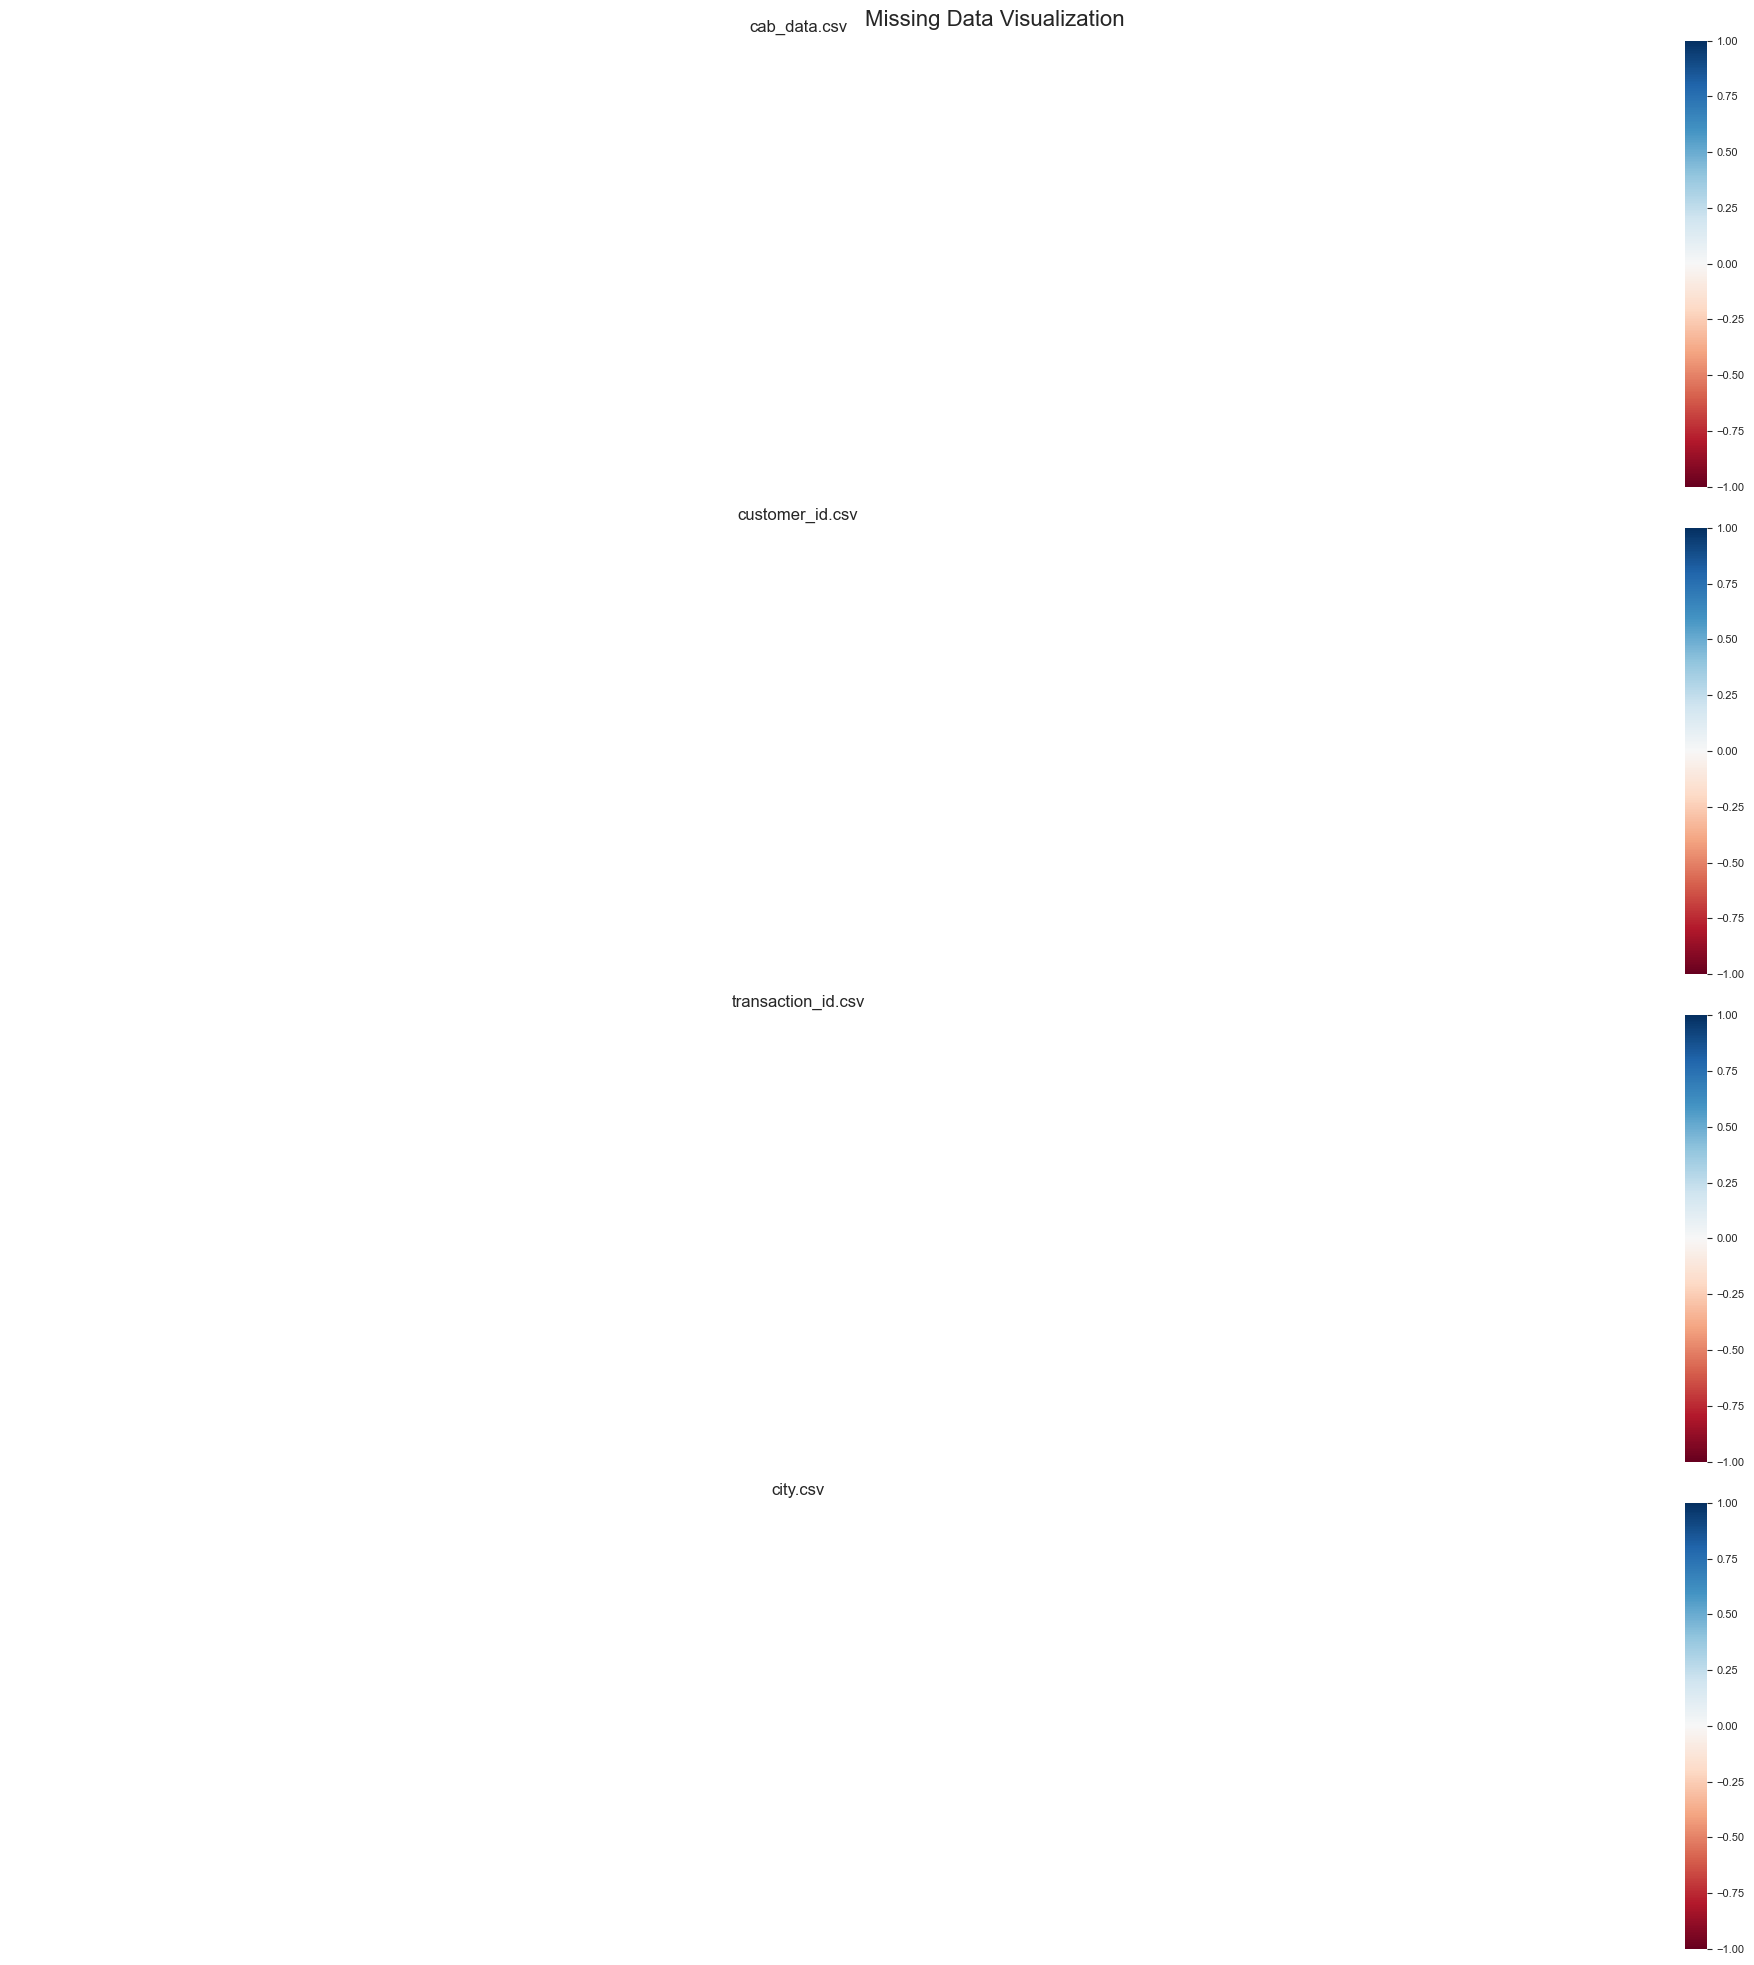

In [178]:
def visualize_missing_values(data_list):
    fig, axes = plt.subplots(nrows=len(data_list), figsize=(20, 20))
    fig.suptitle("Missing Data Visualization", fontsize=16)
    
    for i, data in enumerate(data_list):
        df = pd.read_csv(data)
        msno.heatmap(df, ax=axes[i])
        axes[i].set_title(f"{data}", fontsize=12)
        
    plt.tight_layout()
    plt.show()

visualize_missing_values(data_list)

In [179]:
df.dtypes

Transaction ID          int64
Date of Travel         object
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Population             object
Users                  object
dtype: object

2.Visualization

The following code will create a bar chart showing the percentage of total travel costs by company (Pink Cab vs Yellow Cab) for each city in the dataset.

In [180]:
df_grouped_city_cost_huecompany = df.groupby(['City', 'Company']).sum()['Cost of Trip'].unstack()
df_grouped_city_cost_huecompany 

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,436305.724,1.701503e+06
AUSTIN TX,451127.420,8.993141e+05
BOSTON MA,1296658.322,7.294378e+06
CHICAGO IL,2317463.652,1.413654e+07
DALLAS TX,334105.288,1.679591e+06
DENVER CO,344441.281,7.205052e+05
LOS ANGELES CA,4945493.695,8.438422e+06
MIAMI FL,490363.439,1.331471e+06
NASHVILLE TN,454992.516,3.545834e+05


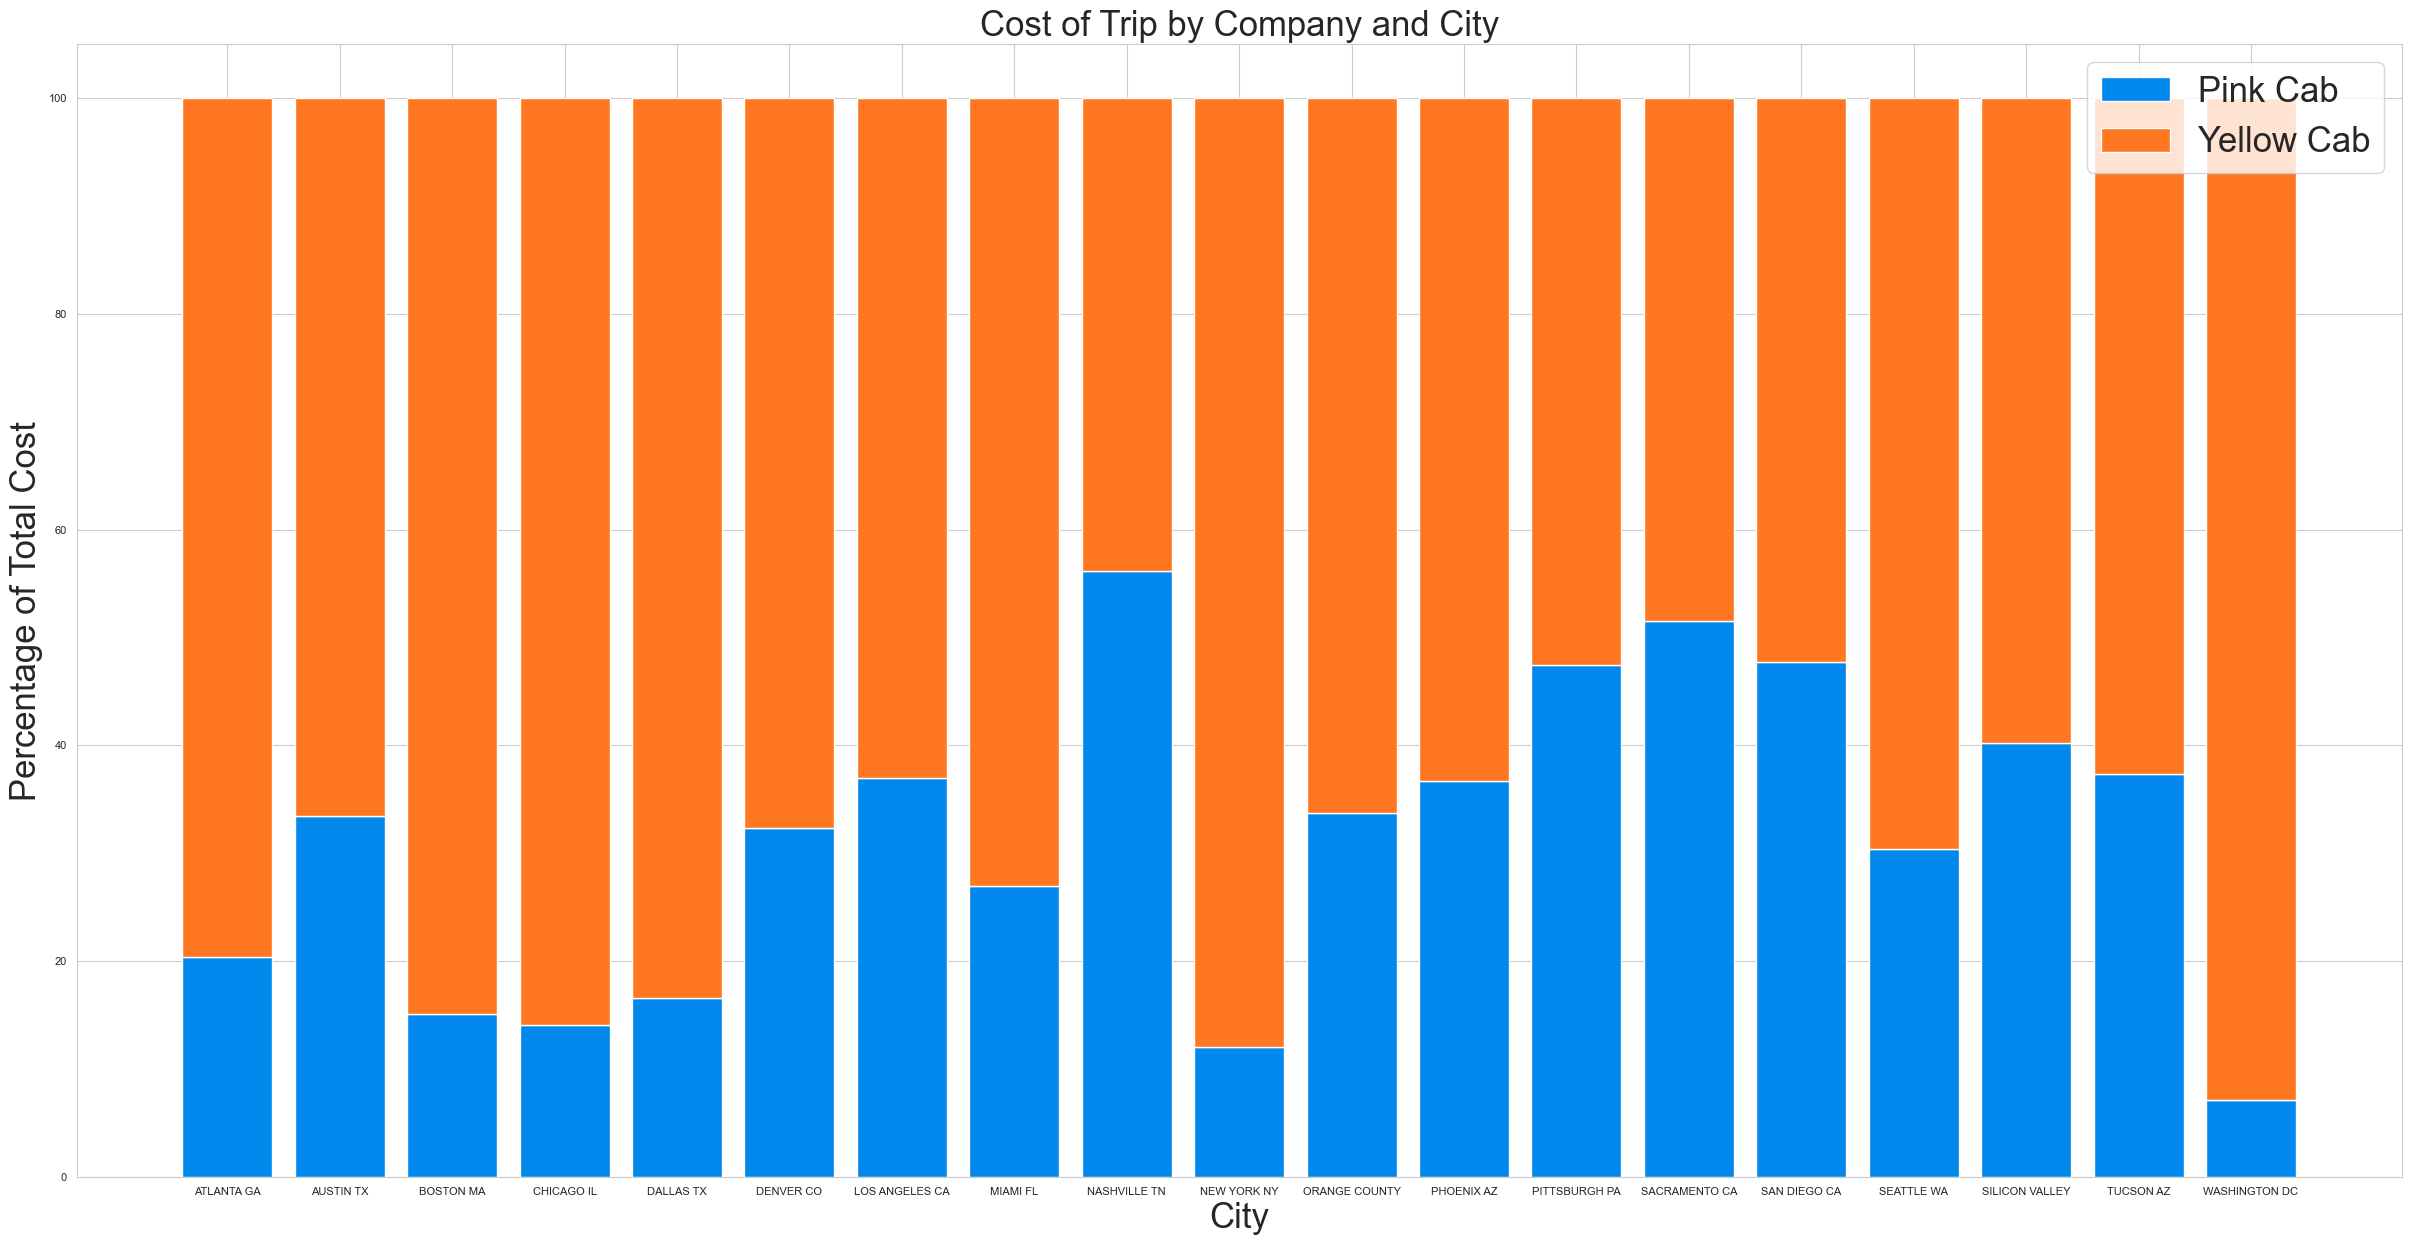

In [181]:
df_perc = df_grouped_city_cost_huecompany .div(df_grouped_city_cost_huecompany .sum(axis=1), axis=0) * 100

plt.figure(figsize=(30, 15)) # grafiğin boyutunu ayarla
plt.bar(df_perc.index, df_perc['Pink Cab'], label='Pink Cab')
plt.bar(df_perc.index, df_perc['Yellow Cab'], bottom=df_perc['Pink Cab'], label='Yellow Cab')
plt.title('Cost of Trip by Company and City',fontsize=25)
plt.xlabel('City',fontsize=25)
plt.ylabel('Percentage of Total Cost',fontsize=25)
plt.legend(fontsize=25)
plt.show()

This code groups the data frame by the 'Cost of Trip' column and calculates the total travel costs for each company, then visualizes them.

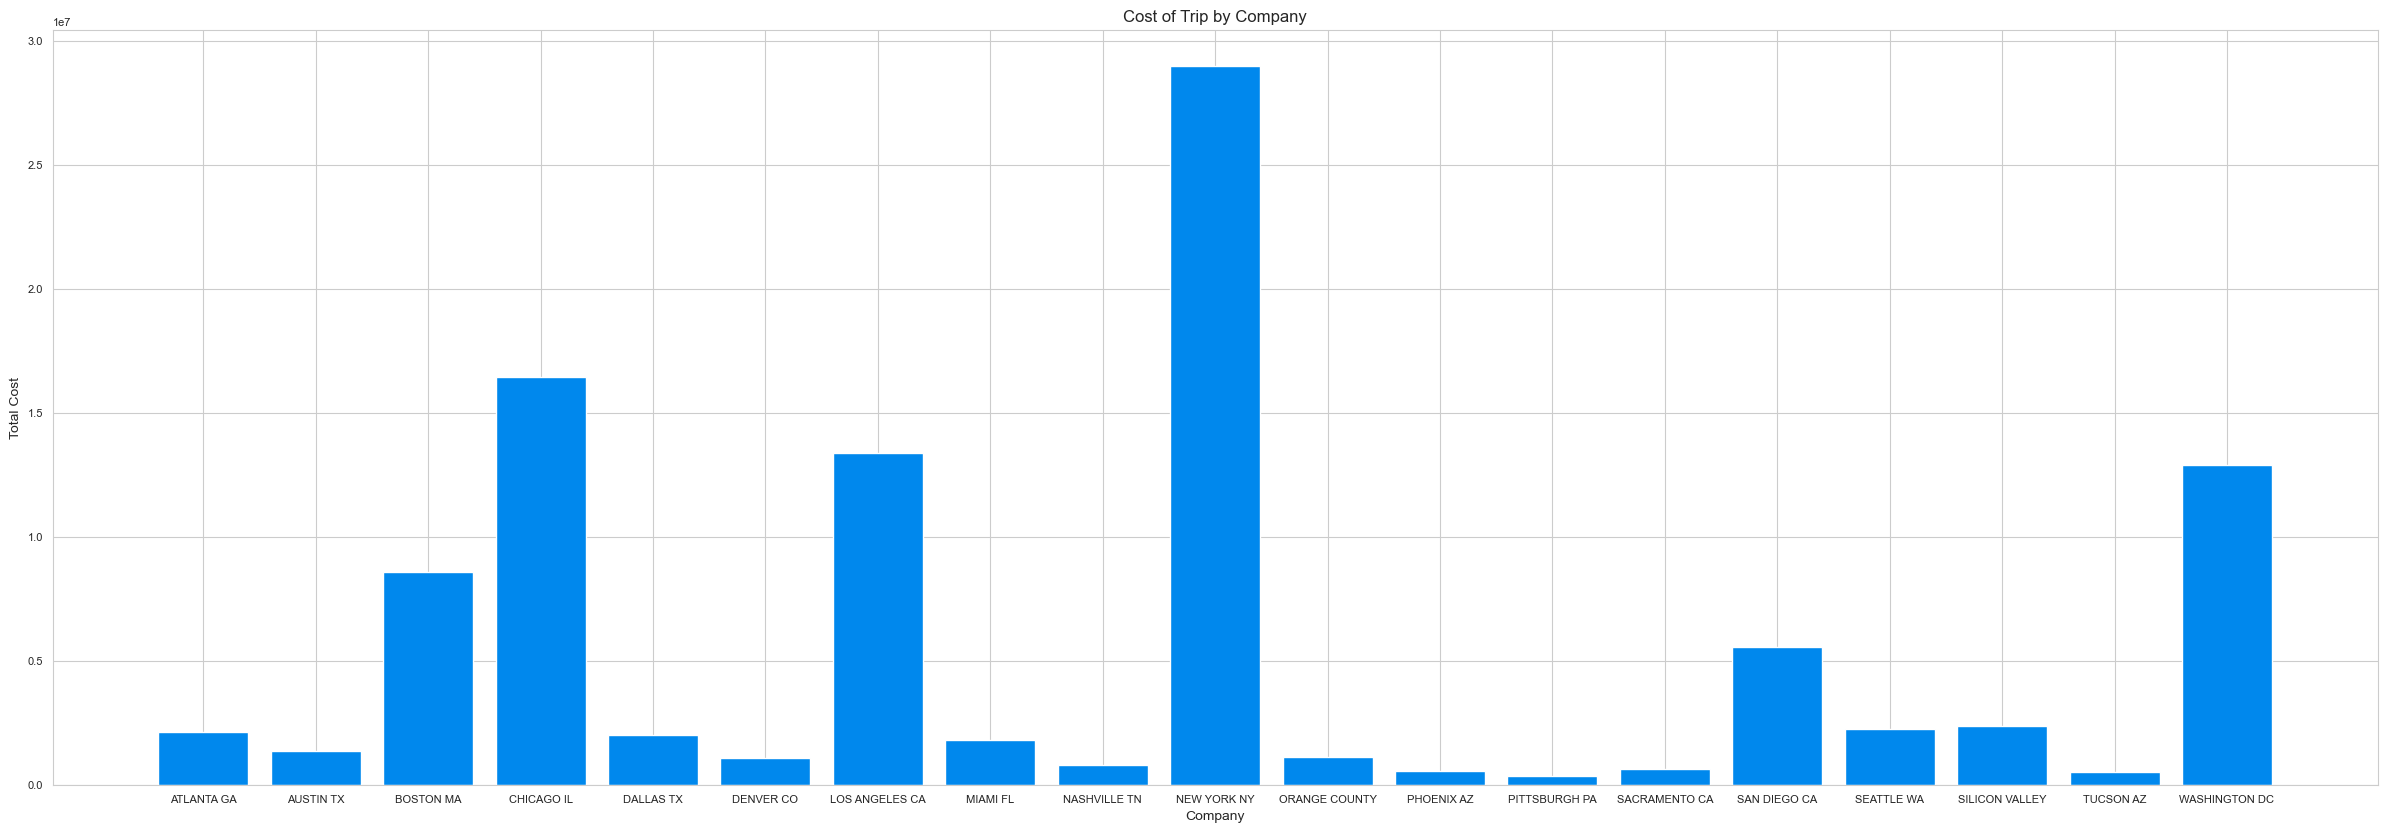

In [182]:
df_grouped_city_cost= df.groupby('City')['Cost of Trip'].sum().reset_index()

plt.figure(figsize=(30, 10))
plt.bar(df_grouped_city_cost['City'], df_grouped_city_cost['Cost of Trip'])
plt.title('Cost of Trip by Company')
plt.xlabel('Company')
plt.ylabel('Total Cost')
plt.show()

From these 2 graphs we understand that :
1. Yellow Cab makes more profit
2. Cab industry earns the most in new York

In [183]:

df_grouped_gender_taxiusage= df.groupby('Gender')['Price Charged'].sum().reset_index()

df_grouped_gender_taxiusage

,Gender,Price Charged
0,Female,64372516.78
1,Male,87809621.74


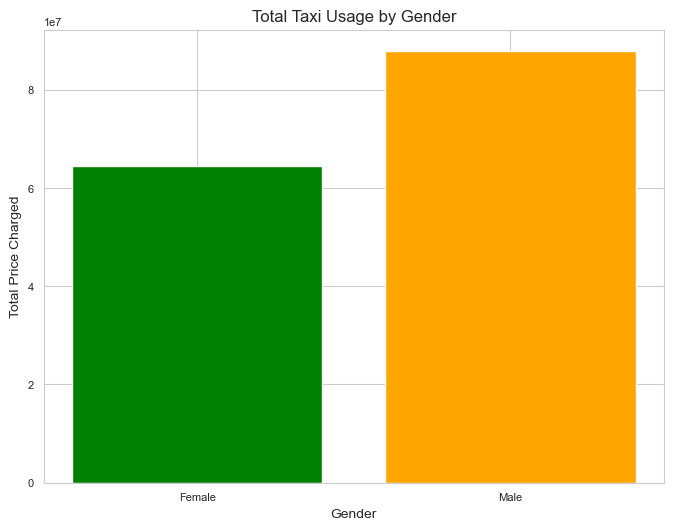

In [184]:
plt.figure(figsize=(8, 6))


plt.bar(df_grouped_gender_taxiusage['Gender'], df_grouped_gender_taxiusage['Price Charged'] ,color=['green', 'orange'])
plt.title('Total Taxi Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Price Charged')
plt.show()

In [185]:
df_grouped_cab_cashorcard = df.groupby('Payment_Mode')['Gender'].value_counts()

df_grouped_cab_cashorcard

Payment_Mode  Gender
Card          Male      123479
              Female     92025
Cash          Male       82433
              Female     61455
Name: Gender, dtype: int64

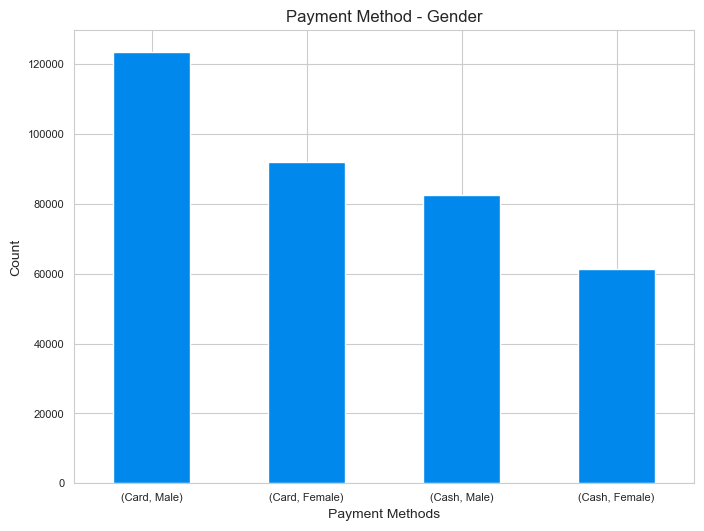

In [186]:

plt.figure(figsize=(8, 6))

df_grouped_cab_cashorcard.plot(kind='bar', stacked=True)

plt.title('Payment Method - Gender')
plt.xlabel('Payment Methods')
plt.ylabel('Count')

# Eksen etiketlerini düzenleme
plt.xticks(rotation=0)

# Grafik gösterme
plt.show()

In [187]:
df_gender_costoftrip = df.groupby('Gender')['Cost of Trip'].sum().reset_index()

df_gender_costoftrip


,Gender,Cost of Trip
0,Female,4.391057e+07
1,Male,5.894387e+07


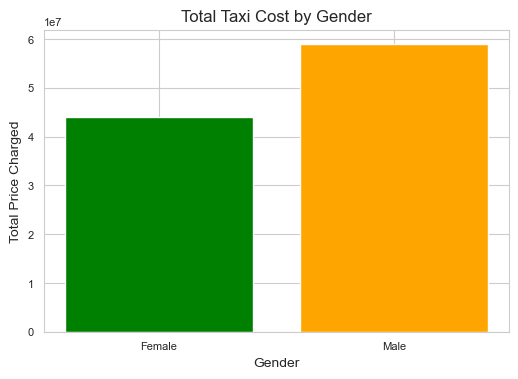

In [188]:

plt.bar(df_gender_costoftrip['Gender'], df_gender_costoftrip['Cost of Trip'] ,color=['green', 'orange'])
plt.title('Total Taxi Cost by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Price Charged')
plt.show()

From these graphs we understand that :
1. Yellow Cab makes more profit
2. Cab industry earns the most in new York
3. Men travel by taxi more than women
4. People pay by card rather than cash
5. Men pay more for taxis than women